In [1]:
import Matrices as mat

In [2]:
def solve_linear_system(A, b):
    # Construct augmented matrix [A | b]
    augmented_matrix = [row + [bi] for row, bi in zip(A, b)]

    # Gaussian Elimination
    for i in range(len(augmented_matrix)-1):
        pivot_row = max(range(i, len(augmented_matrix)), key=lambda j: abs(augmented_matrix[j][i]))
        augmented_matrix[i], augmented_matrix[pivot_row] = augmented_matrix[pivot_row], augmented_matrix[i]
        
        pivot = augmented_matrix[i][i]
        for j in range(i+1, len(augmented_matrix)):
            factor = augmented_matrix[j][i] / pivot
            for k in range(i, len(augmented_matrix[0])):
                augmented_matrix[j][k] -= factor * augmented_matrix[i][k]

    # Back Substitution
    x = [0] * len(A[0])
    for i in range(len(augmented_matrix)-1, -1, -1):
        x[i] = augmented_matrix[i][-1]
        for j in range(i+1, len(augmented_matrix[0])-1):
            x[i] -= augmented_matrix[i][j] * x[j]
        x[i] /= augmented_matrix[i][i]

    return x

# Example usage:
A = [[2, 1, -1],
     [-3, -1, 2],
     [-2, 1, 2]]
b = [8, -11, -3]

solution = solve_linear_system(A, b)
print("Solution:", solution)


Solution: [2.0, 3.0000000000000004, -0.9999999999999999]


In [3]:
def threshold_matrix(matrix, threshold):
    binary_matrix = []
    for row in matrix:
        binary_row = [1 if element >= threshold else 0 for element in row]
        binary_matrix.append(binary_row)
    return binary_matrix

# Example usage:
numerical_matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
threshold = 5

binary_matrix = threshold_matrix(numerical_matrix, threshold)
for row in binary_matrix:
    print(row)

[0, 0, 0]
[0, 1, 1]
[1, 1, 1]


In [4]:
A = mat.Matrix([
    [2, 1, -1],
    [-3, -1, 2],
    [-2, 1, 2]
    ])
print(A)

(2, 1, -1)
(-3, -1, 2)
(-2, 1, 2)


In [5]:
mat.qr_algorithm(A)

([1.8998348262513458, -0.016454513764260745, 1.0106848761766047],
  <Matrices.Vector.Vector at 0x10d157ec0>])

In [6]:
print(A.transpose())

(2, -3, -2)
(1, -1, 1)
(-1, 2, 2)


In [8]:
print(A.inverse().toInt())

(4, 3, -1)
(-2, -2, 1)
(5, 4, -1)


In [ ]:
A.get_shape()

(3, 3)

In [ ]:
A.get_values()

((2, 1, -1), (-3, -1, 2), (-2, 1, 2))

In [ ]:
print(A.getMinor(1, 1))

(2, -1)
(-2, 2)


In [ ]:
A.getDeterminant()

-1

In [ ]:
A.toArray()

array([[ 2,  1, -1],
       [-3, -1,  2],
       [-2,  1,  2]])

In [9]:
A.qr_decomposition()

(<Matrices.Matrix.Matrix at 0x10d157a70>,
 <Matrices.Matrix.Matrix at 0x10db14e00>)

In [10]:
A.svd_qr()

(<Matrices.Matrix.Matrix at 0x10db39040>,
 [2.449489742783178, 3.605551275463989, 2.9481522228691595],
 <Matrices.Matrix.Matrix at 0x10db38d10>)

In [11]:
import matplotlib.pyplot as plt

In [12]:
import datetime

In [13]:
def executionTime(func, *args):
    start = datetime.datetime.now()

    func(*args)
    end = datetime.datetime.now()
    return end - start

Matrix size:  95

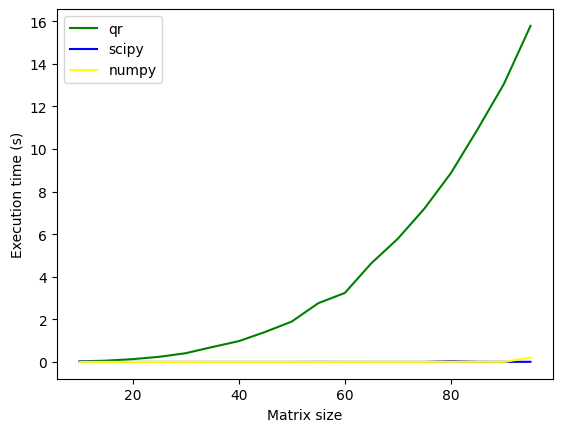

In [18]:
values = {"qr" : {"values" : {}, "color" : "green"},
          "scipy" : {"values" : {}, "color" : "blue"},
          "numpy" : {"values" : {}, "color" : "yellow"}
}

for i in range(10, 100, 5):
    m = mat.Matrix.randintMatrix(i, i, 0, 10)
    
    print("\rMatrix size: ", i, end='', flush=True)
    
    #values["power"]["values"][i] = executionTime(mat.getSVD_power, m)
    values["qr"]["values"][i] = executionTime(mat.qr_algorithm, m)
    values["scipy"]["values"][i] = executionTime(m.scipyEigenvalues)
    values["numpy"]["values"][i] = executionTime(m.numpyEigenvalues)


In [ ]:
# plot the values
for key in values:
    plt.plot(list(values[key]["values"].keys()), [value.total_seconds() for value in values[key]["values"].values()], color=values[key]["color"], label=key)

plt.xlabel("Matrix size")
#log scale
plt.yscale("log")
plt.ylabel("Execution time (s)")
plt.legend()
plt.savefig("execution_time.png")